In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/spookyAuthors/train.zip", index_col=['id'])
test = pd.read_csv("data/spookyAuthors/test.zip", index_col=['id'])
sample_submission = pd.read_csv("data/spookyAuthors/sample_submission.zip", index_col=['id'])

print(train.shape, test.shape, sample_submission.shape)
print(set(train.columns) - set(test.columns))

(19579, 2) (8392, 1) (8392, 3)
{'author'}


In [3]:
train.head(10)

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL
id22965,"A youth passed in solitude, my best years spen...",MWS
id09674,"The astronomer, perhaps, at this point, took r...",EAP
id13515,The surcingle hung in ribands from my body.,EAP
id19322,I knew that you could not say to yourself 'ste...,EAP


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

още известно време просто пробвам някакви неща от презентацията

In [5]:
pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', LinearSVC())
])

cross_val_score(pipeline, train.text, train.author, cv=3, n_jobs=3)

array([ 0.78783701,  0.79635305,  0.79509579])

In [6]:
pipeline.fit(train.text, train.author)
count_vectorizer = pipeline.steps
count_vectorizer

[('features',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
       verbose=0))]

In [7]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

cross_val_score(pipeline, train.text, train.author, cv=3, n_jobs=3, scoring="neg_log_loss")

array([-1.49606094, -1.43222875, -1.46368282])

In [8]:
explore = train.copy()

# бр. думи в текста
explore['words'] = explore.text.apply(lambda s: len(str(s).split()))

# бр. уникални думи
explore['unique_words'] = explore.text.apply(lambda s: len(set(str(s).split())))

# бр. символи
explore['symbols'] = explore.text.str.len()

# бр. уникални символи
explore['unique_symbols'] = explore.text.apply(lambda s: len(set(str(s))))

In [9]:
import string
import numpy as np

In [10]:
# бр. главни букви
explore['capital_letters'] = explore.text.apply(lambda s: sum([str.isupper(c) for c in str(s)]))

# бр. на думи съдържащи само главни буква
explore['only_capital_letter_words'] = explore.text.apply(lambda s: sum([str.isupper(w) for w in str(s).split()]))

# средна дължина на дума
explore['average_word_lenght'] = explore.text.apply(lambda s: np.mean([len(w) for w in str(s).split()]))

# бр. цифрите
explore['digits'] = explore.text.apply(lambda s: sum([str.isdigit(c) for c in str(s)]))

# бр. на препинателни знаци
train["punctuation"] = train.text.apply(lambda s: sum([c in string.punctuation for c in str(s)]) )

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
import nltk
#nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
print(len(stopwords))
print(stopwords)

explore['stop_words'] = explore.text.apply(lambda s: sum(w in stopwords for w in str(s).split()))

153
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Index(['text', 'author', 'words', 'unique_words', 'symbols', 'unique_symbols',
       'capital_letters', 'only_capital_letter_words', 'average_word_lenght',
       'digits', 'stop_words'],
      dtype='object')


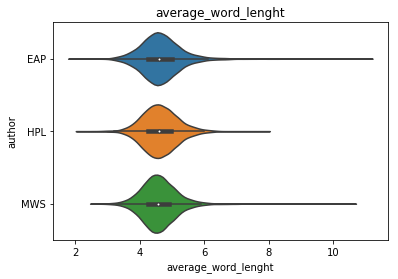

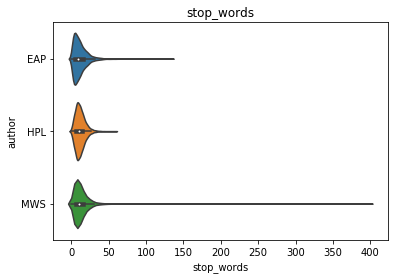

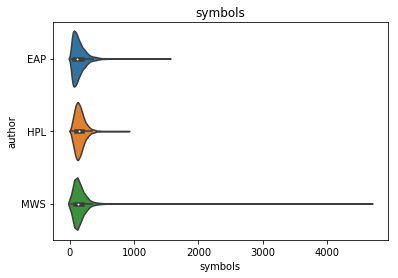

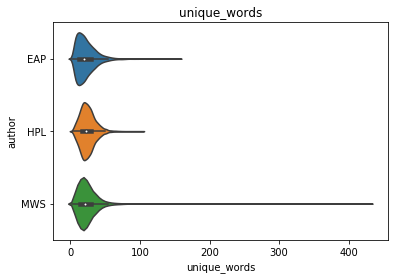

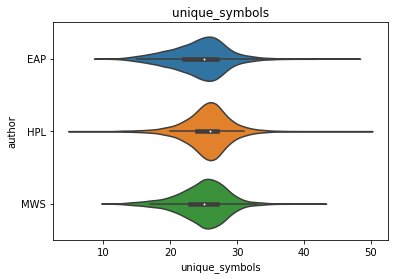

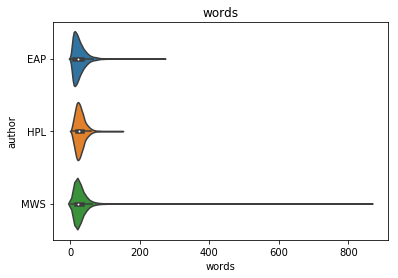

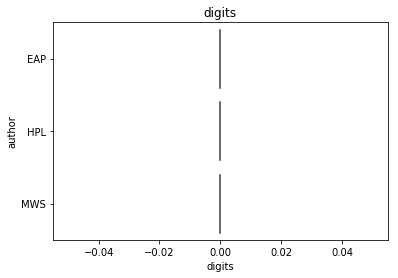

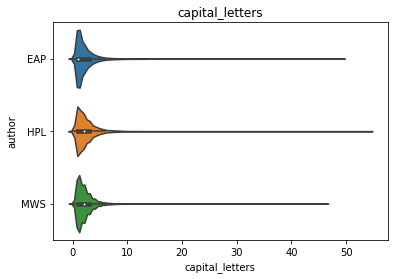

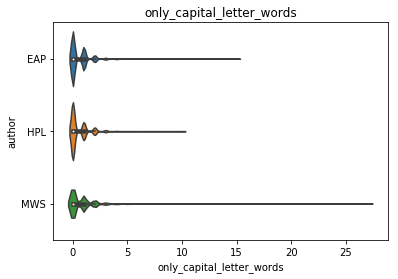

In [13]:
print(explore.columns)
features_names = list(set(explore.columns) - {'text', 'author'})

for feature in features_names:
    plt.figure()
    sns.violinplot(x=feature, y="author", data=explore)
    plt.title(feature);

In [14]:
cross_val_score(RandomForestClassifier(), explore[features_names], explore.author, cv=3, n_jobs=3)

array([ 0.39522059,  0.39764021,  0.39693487])

резултатите тук все още са лоши. Графиките все още също са до голяма степен подобни
можем да пробваме да се оттървем от някой фиичъри или да запазим по-значимите - просто за пробата
визуално бих казал, че първо digits не ни върши абсолютно никаква работа. Също така бих махнал average_word_length

In [15]:
features_names = list(set(features_names) - {'average_word_lenght', 'digits'})

In [16]:
cross_val_score(RandomForestClassifier(), explore[features_names], explore.author, cv=3, n_jobs=3)

array([ 0.39690564,  0.39978547,  0.39555556])

In [17]:
from sklearn.linear_model import LogisticRegression

cross_val_score(LogisticRegression(), explore[features_names], train.author, cv=3, n_jobs=3)

array([ 0.45833333,  0.44698131,  0.44735632])

по-скоро няма да стане така. Но все пак може да махнем още няколко просто за да се пробваме с малко фийчъри

In [18]:
features_names = ['words', 'unique_words', 'only_capital_letter_words']
cross_val_score(RandomForestClassifier(), explore[features_names], explore.author, cv=3, n_jobs=3)

array([ 0.40946691,  0.40376954,  0.39969349])

и нищо особено интересно не се случи

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=.15, max_features=1000)
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=15, random_state=0)
topics = lda.fit_transform(X)

In [20]:
cross_val_score(RandomForestClassifier(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.55070466,  0.538768  ,  0.55065134])

вероятно не много правилна употреба на LDA

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.8, lowercase=False)
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=10, learning_method="online", max_iter=15, random_state=0)
topics = lda.fit_transform(X)

In [22]:
from sklearn.naive_bayes import MultinomialNB
cross_val_score(MultinomialNB(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.40349265,  0.40346307,  0.4035249 ])

последвана от потенциално по-глупава такава, имайки предвид, че Naive Bayes работи с текст (или векторизиран текст)

In [23]:
topics

array([[ 0.01219859,  0.01219859,  0.01219859, ...,  0.01219859,
         0.09772764,  0.78604525],
       [ 0.01963799,  0.01963799,  0.01963799, ...,  0.01963799,
         0.1562286 ,  0.68666748],
       [ 0.01280694,  0.03507917,  0.01279574, ...,  0.01279574,
         0.01279574,  0.79854851],
       ..., 
       [ 0.18859167,  0.02249705,  0.02249705, ...,  0.02249705,
         0.02249705,  0.55673004],
       [ 0.01906942,  0.01906942,  0.01906942, ...,  0.0752197 ,
         0.01906942,  0.77222493],
       [ 0.01615169,  0.01615169,  0.01615169, ...,  0.01615169,
         0.01615169,  0.81251475]])

Изглежда странно, но си има обяснение, явно. Една реализация на алгоритъма дава на всяка дума произволен от 10те топика и след това прави някакъв брой итерации(max_iter?), за да види кои думи имат тенденцията да се срещат заедно - това би означавало, че има по-голям шанс да са от един и същи топик. Вектора, който ни дава този "decomposition" най-вероятно представлява каква част от всеки топик се садържа в даденото изречение. Това би ги прави един вид фийчъри, който можем да използваме за класиикацията си

In [24]:
topics.shape

(19579, 10)

In [25]:
cross_val_score(LinearSVC(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.41191789,  0.41020533,  0.40689655])

In [26]:
import mglearn

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
de            Obed          wonderful     immediate     will not      
queer         worst         principal     regard        ye            
cellar        est           saved         thy           Why           
crowded       value         resistance    Prefect       do you        
remains       Grace         few days      the Prefect   objects       
obliged       nor the       the principal enemies       able          
glorious      to describe   and passed    injury        leave         
Rue           jest          courage and   from our      it will       
accompany     heh           Charles       Martense      able to       
the Rue       volume        The result    Your diddler  folks         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
answ

след като изкарахме разделението на 10 топика виждаме, че в тях няма много смисъл на пръв поглед. Понеже LDA не е адски бърз ще трябва да опитаме да оправим някои неща "на око"

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=10, learning_method="online", max_iter=15, random_state=0)
topics = lda.fit_transform(X)

In [28]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
leave         heard         coming        replied       man           
later         began         step          picture       said          
strength      light         respect       pocket        eyes          
valley        longer        places        enemy         saw           
number        night         captain       automaton     think         
danger        man           afterward     absolutely    right         
son           like          spoken        remains       thing         
journey       day           spent         paid          hand          
midnight      friends       profound      concerning    speak         
walked        sun           lights        notes         head          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
life

In [29]:
cross_val_score(RandomForestClassifier(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.41222426,  0.41939933,  0.41241379])

в миналите топици имаше повече stop words, който вероятно не помагат на класификацията. min/max _df махнах понеже редките думи може би все пак са полезни за разпознаването, a често срещаните пак може да са полезни. 

Topic-ите са една идея по-смислени, но пак има какво да се желае - може да има по-смислени конфигурации - като повече топици, например. Или дори можем да вкараме още фийчъри, който нямат нищо общо с topic-ите, въпреки че това малко ме съмнява смислеността му.

TfidVectorizer-a може би създава повече проблеми отколкото решава (въпреки, че в примерите с LDA обикновено се ползва той)

In [30]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=15, random_state=0)
topics = lda.fit_transform(X)

In [31]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          death         old           life          sea           
felt          half          man           know          city          
far           human         years         let           earth         
point         voice         house         said          black         
taken         called        place         shall         moon          
reason        countenance   known         nature        like          
lost          hands         young         world         air           
boat          expression    told          mind          high          
place         wonder        kind          mr            white         
town          eyes          quite         make          floor         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
grea

In [32]:
cross_val_score(RandomForestClassifier(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.52405025,  0.53003371,  0.52030651])

добре - тайната била в max_features, не в Count или Tfidf - това значи, че освен да върнем Tfidf можем да си поиграем с max и min _df ако имаме само краен брой думи за векторизиране(с чийто брой също можем да си поиграем). Ако 1000 или нещо по-малко е оптимално даже няма смисъл да си игрем с n-грами

In [33]:
def ldaReport(lda, topics, vectorizer):
    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vectorizer.get_feature_names())
    print(mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10))
    print(cross_val_score(RandomForestClassifier(), topics, explore.author, cv=3, n_jobs=3))

In [34]:
vectorizer = CountVectorizer(stop_words='english', max_df=.15, max_features=2500)
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=20, learning_method="batch", max_iter=15, random_state=0, n_jobs=-1)
topics = lda.fit_transform(X)

In [35]:
ldaReport(lda, topics, vectorizer)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
years         door          love          heard         man           
let           place         raymond       voice         young         
heart         opened        hope          come          peculiar      
death         gods          perdita       great         period        
tears         step          oh            old           old           
die           wife          heart         man           make          
despair       came          beauty        lady          expression    
child         open          friends       said          eyes          
age           taken         sure          words         features      
passed        wish          knowledge     eyes          marked        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
quit

In [36]:
cross_val_score(LinearSVC(), topics, explore.author, cv=3, n_jobs=3)

array([ 0.53553922,  0.54351823,  0.54176245])

С LDA може би няма да стане много по-добре - Tfidf си е бил по-проблемен, LDA е твърде бавен за grid search, 1000 topic-a и 10000 думи не вдигат резултата много, нещата по средата също.

Теми без "К'тулу" и "Франкенштайн" не са може би толкова изненадващи понеже тях може да ги има в един или два цитата, а не във всички и така и така не биха ни помогнали особено да разпознаем писателя в общия случай

In [37]:
vectorizer = CountVectorizer(stop_words='english', max_df=.15, max_features=2500)
X = vectorizer.fit_transform(train.text)

lda = LatentDirichletAllocation(n_components=20, learning_method="batch", max_iter=15, random_state=0, n_jobs=-1)
topics = lda.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(topics, explore.author, stratify=explore.author, random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.47967313585291116

Още по-зле, въпреки че това е само най-простия алгоритъм, може би другите ще се справят по-добре

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(topics)
X_scaled = scaler.transform(topics)

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(topics)

In [41]:
from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(labels, explore.author))

-0.00648353814662


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
print(adjusted_rand_score(clusters, explore.author))

-0.0103836612116


Но и те не се справят особено добре - това може би не беше много смислено упражнение